## Main Question

Determining if a game is **Hit** or **Flop** based on its global sales!

##  Complete Exploratory Data Analysis (EDA)

In [29]:
# Importing necessary packages!
import pandas as pd
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

In [30]:
RANDOM_SEED = 2023

In [31]:
# Importing or reading the dataset!
games_dataset = pd.read_csv("Dataset/Video_Games_Sales.csv")

In [32]:
# Printing out first five observations of the dataset, to which types of data or features we have in the dataset!
games_dataset.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [33]:
# Basic statistics measures of the dataset!
games_dataset.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [34]:
print(f"Number of features in the dataset is {games_dataset.shape[1]} and the number of observations/rows in the dataset is {games_dataset.shape[0]}")

Number of features in the dataset is 13 and the number of observations/rows in the dataset is 1907


In [35]:
games_dataset.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

* The features Year and Publisher contain missing values!  
* The feature *Year* has 29 missing values, so instead of dropping the observations, We're handling the missing values by imputations which means we are filling the missing values!  
* The feature *Publisher* has 2 missing values. I chose to drop the observations here instead of filling them in!  
    * The reasoning behind this is that it may not make sense to fill in the publisher name with the most common name or any other names!

In [36]:
# Column 'Year' has 29 missing values!
games_dataset['Year'] = games_dataset['Year'].fillna(games_dataset['Year'].mode()[0]) 
# mode() returns the most common values! Therefore we are filling the missing values in the column 'Year' with the most common value in this column!

print("Number of rows/observations before drop: ", games_dataset.shape[0])

# Using dropna() to drop observations that has missing values in the *Publisher* column!
# Also setting the argument *inplace* equals to *True* to make the changes explicitly into the dataset itself and not creating a new dataset!
games_dataset.dropna(subset=['Publisher'], inplace=True)

print("Number of rows/observations after drop: ", games_dataset.shape[0])

Number of rows/observations before drop:  1907
Number of rows/observations after drop:  1905


In [37]:
games_dataset.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

QUESTIONS HERE ............

## Preparing the data for ML classification

### Feature Selection

**Target Class:** *Global* sales feature for predicting if a game has been successfull or not. 'Hit' or 'Flop'!  

Creating a new column in the dataset called 'Hit'. It has a value of 1 or 0 for 'Hit' or 'Flop'!  

For most games selling 3.5K - 5K copies worldwide within 18 months is a solid success, according to "Boardgameweek.com",  
but for this dataset I'm taking the mean of the global sales as the threshold!  

Threshold I'm choosing for the target class is 2.5 which means games with global sales equals or above 6 are considered to be 'Hit' otherwise 'Flop'!  

In [38]:
threshold = games_dataset['Global'].mean()
print(games_dataset['Global'].mean())
# Creating a new column 'Hit'
games_dataset['Hit'] = games_dataset['Global'].apply(lambda x: 1 if x >= threshold else 0)

2.4895118110236223


In [39]:
games_dataset.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Hit
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,1
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,1
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,1
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,1
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,1


In [40]:
games_dataset['Hit'].value_counts() # We have class imbalanced here!

Hit
0    1415
1     490
Name: count, dtype: int64

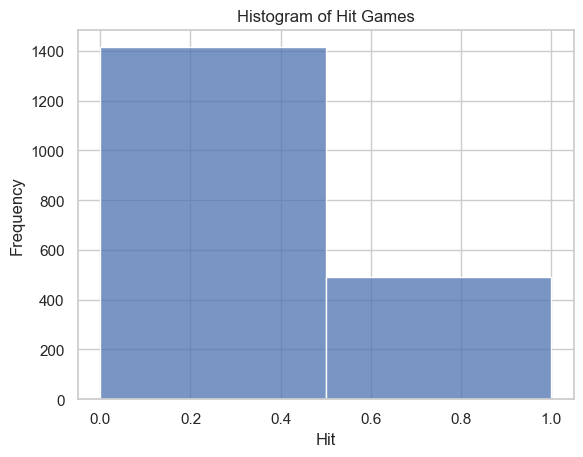

In [41]:
sns.set(style='whitegrid') #Set the style of seaborn for the plot!
fig, ax = plt.subplots() #Create a figure and axis for the plot!
sns.histplot(games_dataset['Hit'], bins=2, ax=ax) #Plotting the histogram using seaborn
# Set the title and labels
ax.set_title('Histogram of Hit Games')
ax.set_xlabel('Hit')
ax.set_ylabel('Frequency')
# Show the plot
plt.show()

* The model trained on this dataset might be biased towards predicting the majority class, because it could achieve a seemingly high accuracy just by predicting the majority class  
all the time!  

* My first try: Building an initial model and testing the model on this dataset and then checking the results! If the model is not performing well on the minority class  
I'll apply techniques such as resampling or SMOTE.  

**Input features**

The features that I have chosen as input features are: *‘Year’, 'Review'* and *‘Genre’*!  

**Question: Why were other features not chosen?**
* **Data Leakage:** The *‘North America’, ‘Europe’, ‘Japan’*, and *‘Rest of World’* features are components of the *‘Global’* sales!  
* **Feature Importance:** The feature *'Rank'* or *'Game Title'* don't seem to be very relevant for answering the main question!  


In [42]:
games_dataset_new = games_dataset[['Year', 'Review','Hit']]
games_dataset_new.head()

,Year,Review,Hit
0,2006.0,76.28,1
1,1985.0,91.00,1
2,2008.0,82.07,1
3,2009.0,82.65,1
4,1989.0,88.00,1


**One-Hot encoding on categorical features**

In [43]:
genre_encoded = pd.get_dummies(games_dataset['Genre'])
games_dataset_new = pd.concat([games_dataset_new, genre_encoded], axis=1)

games_dataset_new.head()


,Year,Review,Hit,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2006.0,76.28,1,False,False,False,False,False,False,False,False,False,False,True,False
1,1985.0,91.00,1,False,False,False,False,True,False,False,False,False,False,False,False
2,2008.0,82.07,1,False,False,False,False,False,False,True,False,False,False,False,False
3,2009.0,82.65,1,False,False,False,False,False,False,False,False,False,False,True,False
4,1989.0,88.00,1,False,False,False,False,False,True,False,False,False,False,False,False


In [44]:
data_X = games_dataset_new.drop('Hit', axis=1) #All columns except 'Hit'! (Input features)
data_y = games_dataset_new['Hit'] #Target class

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=RANDOM_SEED, stratify=data_y)

**Stratify** maintains the same distribution of classes in both training and test sets!  
In other words, it ensures that the train and test sets have the same proportion of class labels as the input dataset!  
In the dataset 75% (approximately) of the data is of class ‘0’ or 'flop' and 25% (approximately) is of class ‘1’ or 'hit', stratification ensures that both your training and test sets maintain this 75:25 ratio!  

* Adding *Stratify* can result in a more robust and generalizable model!  
* *Stratification* ensures that the minority class is adequately represented in both training and test sets, leading to more reliable evaluation metrics!

In [45]:
# Let's create a function to see the dataset easier
def visualize_dataset_with_target_class(X, y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The features from the data
        y: (np.array[N,1]) - The corresponding target class of each sample
    Returns:
        A plot with the dataset and the colors of the respective class
    """
    plt.scatter(x = X[:,0], y = X[:,1], c=y, s=30)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(title)
    plt.grid(True)
    return plt.show()

* **A dictionary with 10 classifiers**

In [46]:
classifiers = {
    'DT1': DecisionTreeClassifier(max_depth=5),
    'DT2': DecisionTreeClassifier(max_depth=10),
    'RF1': RandomForestClassifier(n_estimators=50),
    'RF2': RandomForestClassifier(n_estimators=100),
    'KNN1': KNeighborsClassifier(n_neighbors=1),
    'KNN2': KNeighborsClassifier(n_neighbors=7),
    'SVM1': SVC(kernel='linear', C=1),
    'SVM2': SVC(kernel='rbf', C=1),
    'LR1': LogisticRegression(solver='liblinear'),
    'LR2': LogisticRegression(solver='saga'),
    'NB1': MultinomialNB(alpha=1.0),
    'NB2': MultinomialNB(alpha=0.5)
}

* **Experimental Evaluation**

In [47]:
results = pd.DataFrame({
                "classifier_name": [],
                "training_time": [],
                "prediction_time": [],
                "accuracy": [],
                "precision": [],
                "recall": [],
                "f1": []
                })

In [48]:
# Apply the classifier in each dataset
for name, classifier in classifiers.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)


c:\Users\Farhad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farhad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Farhad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT1,0.002517,0.000999,0.774278,0.714286,0.204082,0.317460
1,DT2,0.002002,0.000000,0.742782,0.500000,0.285714,0.363636
2,RF1,0.053138,0.002000,0.750656,0.519481,0.408163,0.457143
3,RF2,0.108085,0.004508,0.748031,0.513158,0.397959,0.448276
4,KNN1,0.002301,0.006504,0.695538,0.406250,0.397959,0.402062
5,KNN2,0.001502,0.006506,0.779528,0.634615,0.336735,0.440000
6,SVM1,0.040024,0.003000,0.745407,0.521739,0.122449,0.198347
7,SVM2,0.018009,0.012507,0.742782,0.000000,0.000000,0.000000
8,LR1,0.002000,0.001000,0.758530,0.650000,0.132653,0.220339
9,LR2,0.014710,0.000000,0.742782,0.000000,0.000000,0.000000
